In [1]:
import sys
sys.path.append('../..')

In [2]:
import sbi4abm.sbi
from sbi4abm.sbi import analysis, utils
from sbi4abm.utils import sampling, plotting
from sbi4abm.utils.stats import hopfield_summariser
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle
import seaborn as sns
import torch.nn.functional as F

/home/pmms2/sbi4abm/py_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
matplotlib.rc('text', usetex=True)
plt.rcParams.update({
  "text.usetex": False,
  "font.family": "serif"
})
plt.rcParams.update({
    'text.latex.preamble':r"\usepackage{amsmath}"+"\n"+r"\usepackage{bm}"
})

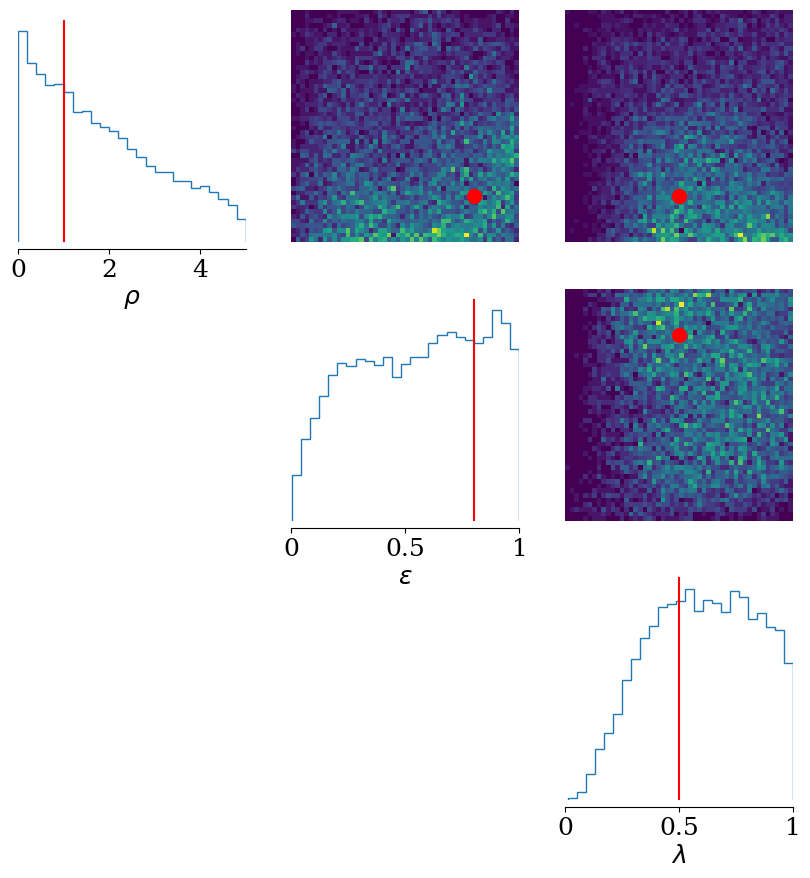

In [65]:
# new stats 1,000,000 simulations

hop = np.loadtxt("../../exp_dir/hopfield/1716819811.054175/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[0,5], [0,1], [0,1]], points=[np.array([1., 0.8, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})

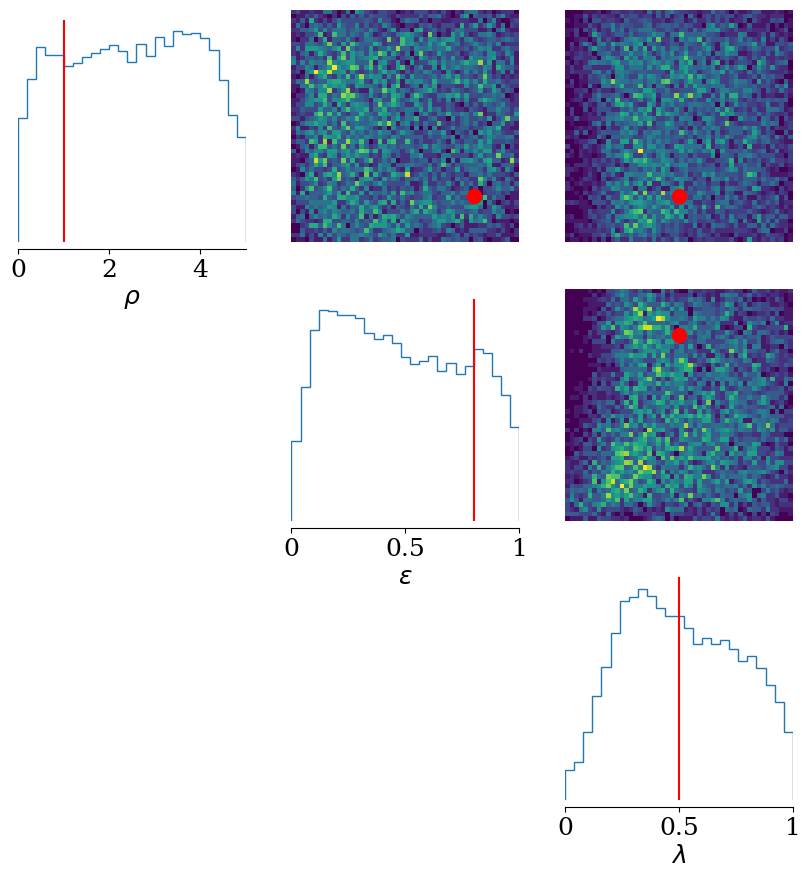

In [77]:
# new stats v2 (only 2 instead of 3 stats)

hop = np.loadtxt("../../exp_dir/hopfield/1717066138.3322291/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[0,5], [0,1], [0,1]], points=[np.array([1., 0.8, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})

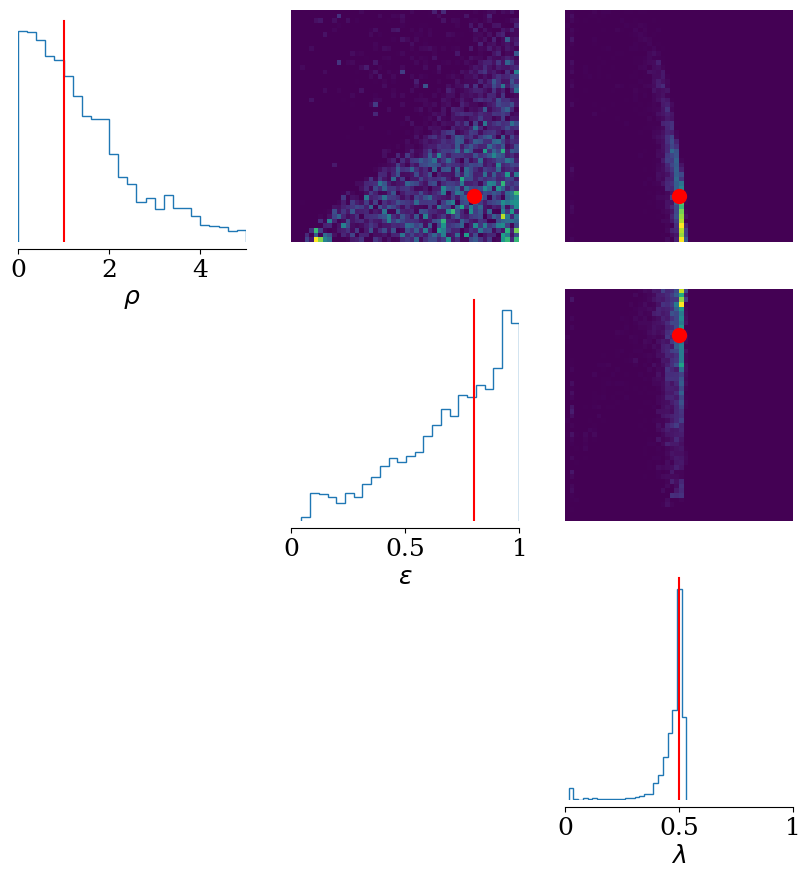

In [21]:
# stats computed with entire time series for 10,000 samples

hop = np.loadtxt("../../exp_dir/hopfield/1712327503.053126/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[0,5], [0,1], [0,1]], points=[np.array([1., 0.8, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})

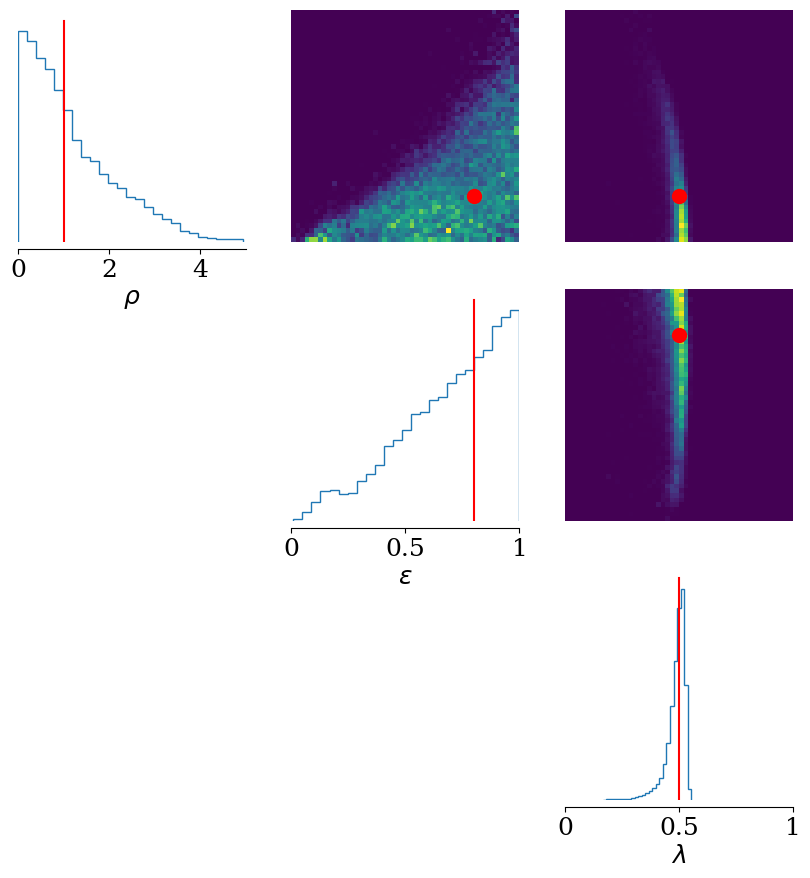

In [7]:
# stats computed with final state for 10,000 samples considering stats 
# only from final state (stats not specific)

hop = np.loadtxt("../../exp_dir/hopfield/1712332120.757694/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[0,5], [0,1], [0,1]], points=[np.array([1., 0.8, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


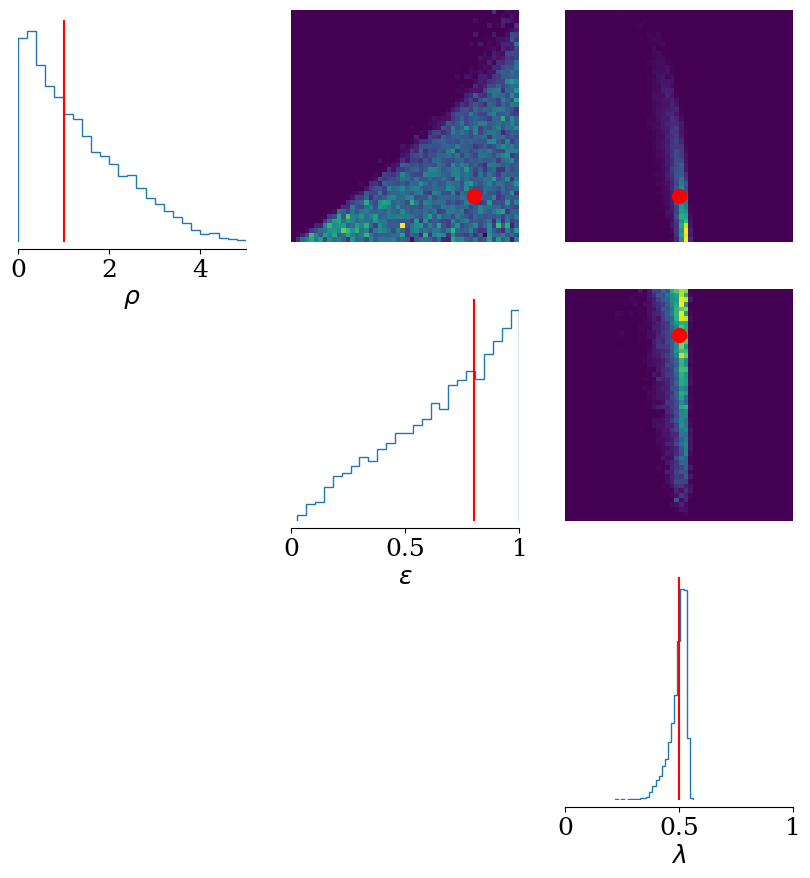

In [4]:
# stats computed with final state for 100,000 samples considering stats 
# only from final state (stats not specific) -> used RESNET_S method

hop = np.loadtxt("../../exp_dir/hopfield/1712332462.340035/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[0,5], [0,1], [0,1]], points=[np.array([1., 0.8, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


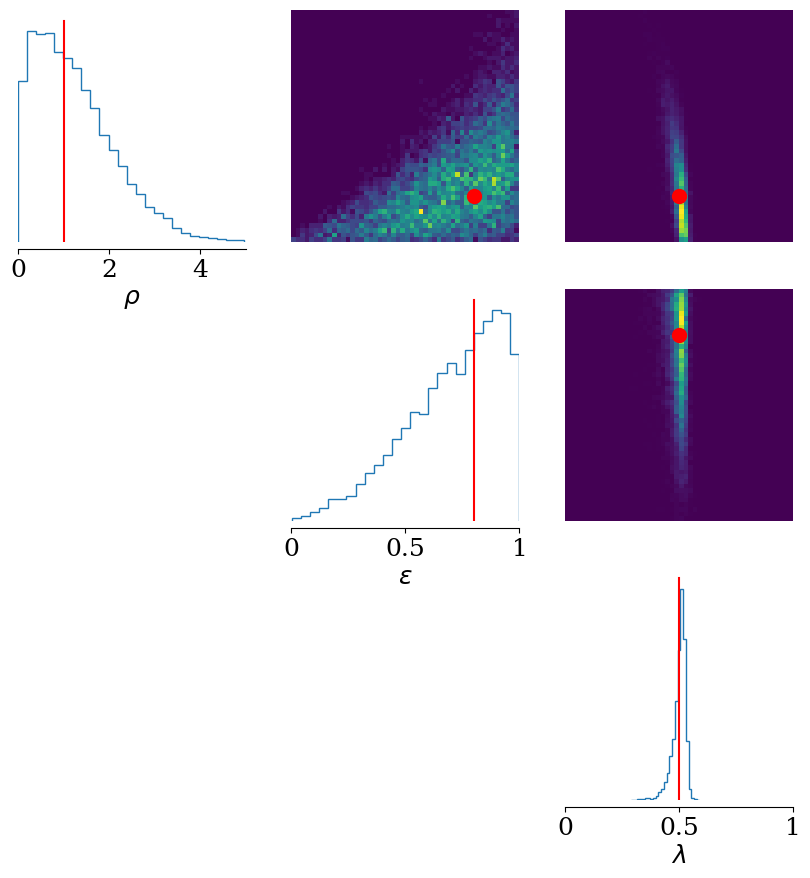

In [68]:
# stats computed with final state for 100,000 samples considering stats 
# only from final state (stats not specific) -> used the MAF_S method

hop = np.loadtxt("../../exp_dir/hopfield/1712855875.9197834/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[0,5], [0,1], [0,1]], points=[np.array([1., 0.8, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


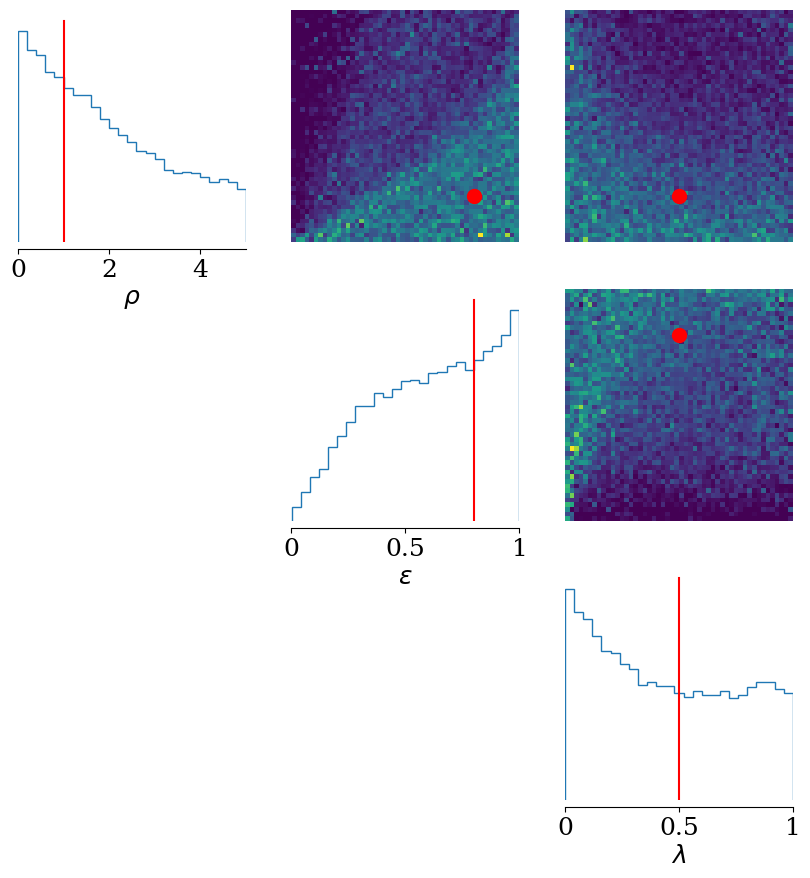

In [9]:
# stats computed with final state for 100,000 samples considering mean and variance of opinions
# and coherence (true statistics) -> mean opinion per topic (2 topcis), variance of opinion
# per topic, and coherence

hop = np.loadtxt("../../exp_dir/hopfield/1712662177.3815513/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[0,5], [0,1], [0,1]], points=[np.array([1., 0.8, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


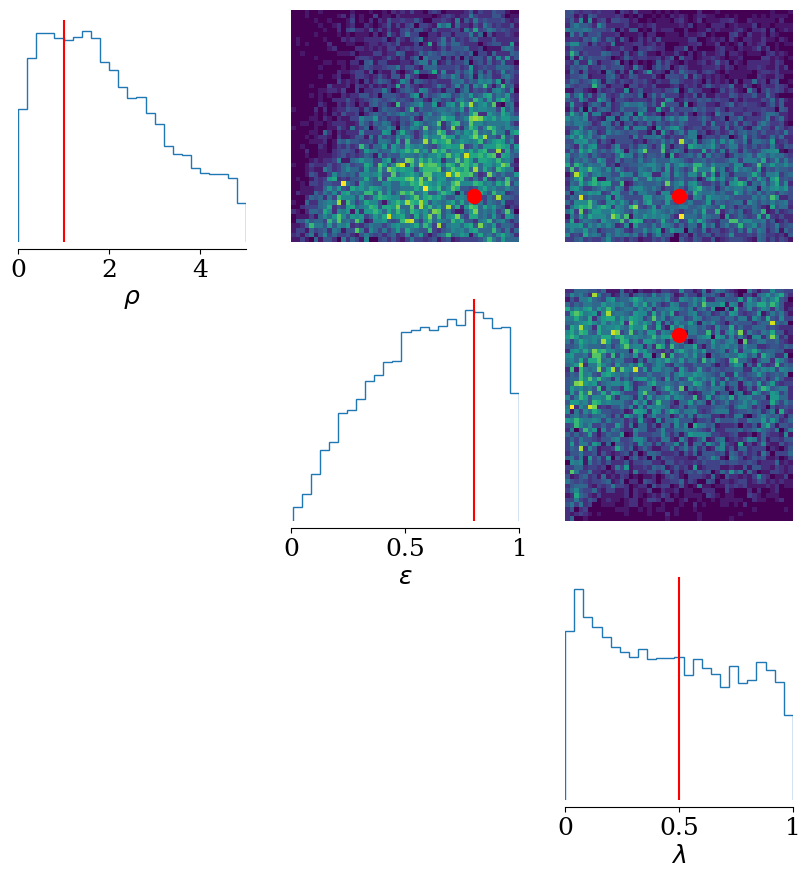

In [58]:
# stats computed with final state for 100,000 samples considering mean and variance of opinions
# and coherence (true statistics) -> mean opinion per topic (2 topcis), variance of opinion
# per topic, and coherence -> used the MAF_S method

hop = np.loadtxt("../../exp_dir/hopfield/1712841701.041694/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[0,5], [0,1], [0,1]], points=[np.array([1., 0.8, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


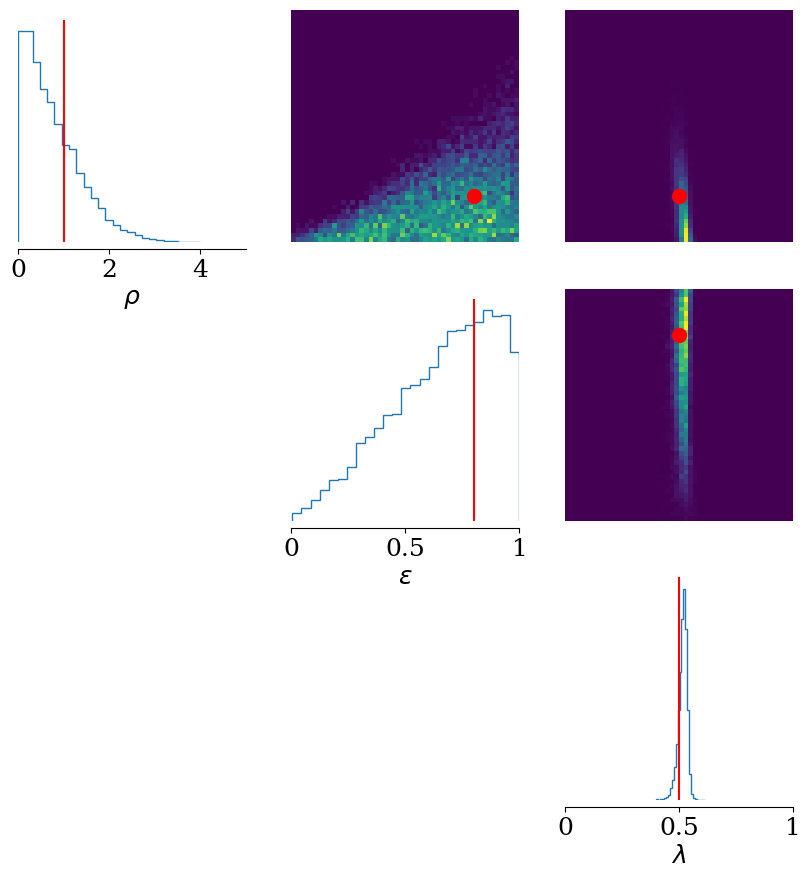

In [16]:
# stats computed with final state for 100,000 samples considering mean and variance of opinions
# and coherence (true statistics) -> mean opinion per topic (2 topcis), variance of opinion
# per topic, and coherence -> used the MAF_S method -> new arch

hop = np.loadtxt("../../exp_dir/hopfield/1715447112.6329813/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[0,5], [0,1], [0,1]], points=[np.array([1., 0.8, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


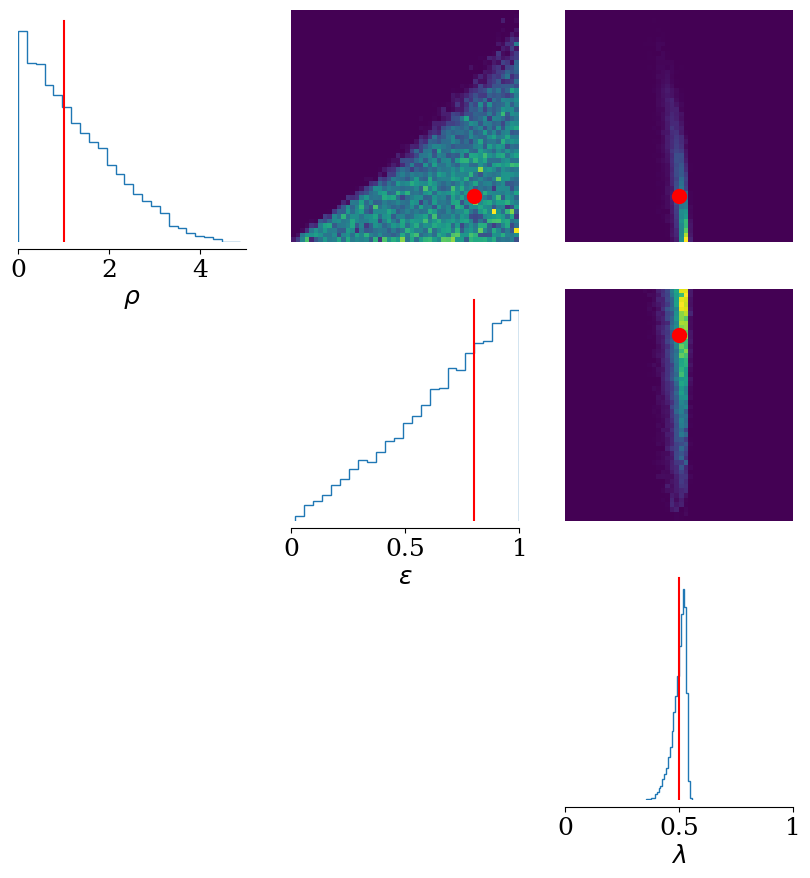

In [7]:
# stats computed with final state for 100,000 samples considering mean and variance of opinions
# and coherence (true statistics) -> mean opinion per topic (2 topcis), variance of opinion
# per topic, and coherence -> used the RESNET_S method -> new arch

hop = np.loadtxt("../../exp_dir/hopfield/1715690008.4109821/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[0,5], [0,1], [0,1]], points=[np.array([1., 0.8, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


# MAP

In [69]:
from sbi4abm.utils import io

hopf = io.load_task('hop')

file_name = "1712855875.9197834"
with open(f"../../exp_dir/hopfield/{file_name}/posteriors.pkl", 'rb') as file:
    posterior = pickle.load(file)
    posterior = posterior[0]

In [70]:
# Define the negative log-posterior function for minimization
def neg_log_posterior(theta, posterior, observed_data):
    theta = torch.tensor(theta).float()
    return -posterior.log_prob(theta, x=observed_data).item()

In [71]:
from scipy.optimize import minimize

# observed data (same format as the onse used to train the posterior)
final_state = hopf[2][-1]
sum_states = np.sum(final_state, axis=0)
magnitude = np.linalg.norm(sum_states)
coherence = magnitude / final_state.shape[0]
mean_opinions = np.mean(final_state, axis=0)
variance_opinions = np.var(final_state, axis=0)
sx = np.concatenate([
    np.array([coherence]), 
    variance_opinions.flatten()
])
observations = torch.tensor(sx)

initial_theta = hopf[1].mean.numpy()

# Optimize to find the MAP estimate
result = minimize(neg_log_posterior, initial_theta, args=(posterior, observations), method='L-BFGS-B')
map_estimate = result.x

print(f"MAP estimate: {map_estimate}")

AssertionError: The shape of the passed `x` torch.Size([1, 53]) and must match the shape of `x`
            used during training, torch.Size([1, 105]).

In [44]:
true_theta = torch.tensor(hopf[3])
map_estimate = torch.tensor(map_estimate)
print(true_theta)
print(map_estimate)
loss = F.mse_loss(map_estimate, true_theta)
print(f"Loss between MAP theta and true theta: {loss.item()}")

tensor([1.0000, 0.8000, 0.5000], dtype=torch.float64)
tensor([2.5000, 0.5000, 0.5000], dtype=torch.float64)
Loss between MAP theta and true theta: 0.7799999999999999


In [45]:
def compute_sats(x):
    if isinstance(x, torch.Tensor):
        x = x.detach().cpu().numpy()
    
    final = x[-1]
    final_s = final[:, -2:]

    # Compute mean opinions per topic
    mean_opinions = np.mean(final_s, axis=0)

    # Compute variance in opinions per topic
    variance_opinions = np.var(final_s, axis=0)

    # Compute coherence
    coherence_per_topic = np.abs(np.sum(final_s, axis=0)) / final_s.shape[0]
    observation_coherence = np.linalg.norm(np.sum(final_s, axis=0)) / final_s.shape[0]

    mean_ops_topic_1 = mean_opinions.flatten()[0]
    mean_ops_topic_2 = mean_opinions.flatten()[1]
    variance_ops_topc_1 = variance_opinions.flatten()[0]
    variance_ops_topc_2 = variance_opinions.flatten()[1]

    stats = torch.tensor([mean_ops_topic_1, 
                        mean_ops_topic_2, 
                        variance_ops_topc_1, 
                        variance_ops_topc_2])
    
    return stats

In [46]:
def compute_joel_stats(x):
    iu1 = np.triu_indices(50)

    if isinstance(x, torch.Tensor):
        x = x.detach().cpu().numpy()
    
    final = x[-1]
    w, s = final[:, :-2], final[:, -2:]
    A = np.sign(w)
    n_neg_triad = np.sum(np.diag((A.dot(A)).dot(A)) + 1) / 2 
    A = (w >= 0).astype(int)
    k = np.sum(A, axis=1)
    glob_clust_coeff = np.trace((A.dot(A)).dot(A)) / np.sum(k*(k-1))
    overlaps = np.dot(s, s.T)[iu1]/2
    weights = w[iu1]
    corr_weight_op = np.corrcoef(weights, overlaps)[0,1]

    stats = torch.tensor([n_neg_triad, corr_weight_op])
    
    return stats

In [47]:
y_star = compute_joel_stats(hopf[0](map_estimate.tolist()))
observations_stats = compute_joel_stats(hopf[2])

print(y_star)
print(observations_stats)

tensor([5.8825e+04, 9.8094e-01], dtype=torch.float64)
tensor([1.6369e+04, 8.3735e-01], dtype=torch.float64)


In [48]:
import torch.nn.functional as F

def loss_function(simulated_output, observed_statistic):
    return F.mse_loss(simulated_output, observed_statistic)


# Compute the loss
loss = loss_function(y_star, observations_stats)

print(f"Loss between s(y_star) and s(y): {loss.item()}")

Loss between s(y_star) and s(y): 901255968.0103086


# Mean

In [28]:
# Generate samples from the posterior
num_samples = 10000  # Number of samples to draw
posterior_samples = posterior.sample((num_samples,), x=observations)

# Compute the mean of the samples
mean_estimate = posterior_samples.mean(dim=0)
print(f"Mean estimate: {mean_estimate}")

Drawing 10000 posterior samples: 18622it [00:00, 59472.43it/s]                          

Mean estimate: tensor([1.2495, 0.7062, 0.4996])


In [29]:
# Compute statistics about the sampled theta values
posterior_samples_np = posterior_samples.numpy()
mean_theta = np.mean(posterior_samples_np, axis=0)
std_theta = np.std(posterior_samples_np, axis=0)
lower_bound_theta = np.percentile(posterior_samples_np, 2.5, axis=0)
upper_bound_theta = np.percentile(posterior_samples_np, 97.5, axis=0)

print(f"Mean of theta: {mean_theta}")
print(f"Standard deviation of theta: {std_theta}")
print(f"95% credible interval for theta: [{lower_bound_theta}, {upper_bound_theta}]")

Mean of theta: [1.2495147  0.70618814 0.49962592]
Standard deviation of theta: [0.8907491  0.20692934 0.02980399]
95% credible interval for theta: [[0.08268884 0.2380777  0.42336454], [3.38936949 0.98403099 0.5391139 ]]


In [30]:
true_theta = torch.tensor(hopf[3])
mean_theta = torch.tensor(mean_theta)
print(true_theta)
print(mean_theta)
loss = F.mse_loss(mean_theta, true_theta)
print(f"Loss between mean theta and true theta: {loss.item()}")

tensor([1.0000, 0.8000, 0.5000], dtype=torch.float64)
tensor([1.2495, 0.7062, 0.4996])
Loss between mean theta and true theta: 0.023686129862766404


In [31]:
y_star = compute_joel_stats(hopf[0](mean_estimate.tolist()))
observations_stats = compute_joel_stats(hopf[2])

print(y_star)
print(observations_stats)

tensor([1.5601e+04, 8.1856e-01], dtype=torch.float64)
tensor([1.6369e+04, 8.3735e-01], dtype=torch.float64)


In [32]:
def loss_function(simulated_output, observed_statistic):
    return F.mse_loss(simulated_output, observed_statistic)


# Compute the loss
loss = loss_function(y_star, observations_stats)

print(f"Loss between s(y_star) and s(y): {loss.item()}")

Loss between s(y_star) and s(y): 294912.0001766524


# Mean different

In [78]:
mean_estimate = np.mean(hop, axis=0)
print(f"Mean estimate: {mean_estimate}")

Mean estimate: [2.492374   0.47778962 0.50880572]


In [79]:
true_theta = torch.tensor(hopf[3])
mean_theta = torch.tensor(mean_estimate)
print(true_theta)
print(mean_theta)
loss = F.mse_loss(mean_theta, true_theta)
print(f"Loss between mean theta and true theta: {loss.item()}")

tensor([1.0000, 0.8000, 0.5000], dtype=torch.float64)
tensor([2.4924, 0.4778, 0.5088], dtype=torch.float64)
Loss between mean theta and true theta: 0.7770257377546552


In [80]:
est_data = hopf[0](mean_estimate)
y_star = compute_joel_stats(est_data)

obs_data = hopf[2]
obs_stats = compute_joel_stats(obs_data)

print(y_star)
print(obs_stats)

tensor([5.8825e+04, 9.8097e-01], dtype=torch.float64)
tensor([1.6369e+04, 8.3735e-01], dtype=torch.float64)


In [81]:
def loss_function(simulated_output, observed_statistic):
    return F.mse_loss(simulated_output, observed_statistic)

# Number of simulations
num_simulations = 10

# List to store the losses of each simulation
losses = []

for i in range(num_simulations):
    # Run the simulation and get the simulated output
    # Note: You need to replace this with your actual simulation code
    est_data = hopf[0](mean_estimate)
    y_star = compute_joel_stats(est_data)   

    # Compute the loss
    loss = loss_function(y_star, obs_stats)

    # Add the loss to the list of losses
    losses.append(loss.item())

# Compute the average loss
average_loss = sum(losses) / num_simulations

print(f"Average Loss: {average_loss}")

Average Loss: 901255968.0103109


# Posterior Predictive Checks 

In [59]:
from sbi4abm.utils import io

hopf = io.load_task('hop')

In [60]:
idxs = np.random.randint(hop.shape[0], size=1000)

### Posterior Predictives

In [61]:
pps = []
for idx in idxs:
    data = hopf[0](list(hop[idx]))
    pps.append(data)

In [34]:
posterior_mean_ops_topic_1 = []
posterior_mean_ops_topic_2 = []
posterior_variance_ops_topc_1 = []
posterior_variance_ops_topc_2 = []
posterior_coherence = []

for pp in pps:
    if isinstance(pp, torch.Tensor):
        pp = pp.detach().cpu().numpy()

    final_state = pp[-1]
    final_s = final_state[:, -2:]
    # Compute mean opinions per topic
    mean_opinions = np.mean(final_s, axis=0)

    # Compute variance in opinions per topic
    variance_opinions = np.var(final_s, axis=0)

    # Compute coherence
    coherence_per_topic = np.abs(np.sum(final_s, axis=0)) / final_s.shape[0]
    overall_coherence = np.linalg.norm(np.sum(final_s, axis=0)) / final_s.shape[0]

    posterior_mean_ops_topic_1.append(mean_opinions.flatten()[0])
    posterior_mean_ops_topic_2.append(mean_opinions.flatten()[1])
    posterior_variance_ops_topc_1.append(variance_opinions.flatten()[0])
    posterior_variance_ops_topc_2.append(variance_opinions.flatten()[1])
    posterior_coherence.append(overall_coherence)

    # sx = np.concatenate([
    #     np.array([overall_coherence]),  # Make scalar a 1D array
    #     mean_opinions.flatten(),  # Already 1D, flatten() is optional
    #     variance_opinions.flatten()  # Already 1D, flatten() is optional
    # ])

### Prior Predictives

In [62]:
pps_ = []
for idx in idxs:
    data = hopf[0](list(hopf[1].sample().tolist()))
    pps_.append(data)

In [10]:
prior_mean_ops_topic_1 = []
prior_mean_ops_topic_2 = []
prior_variance_ops_topc_1 = []
prior_variance_ops_topc_2 = []
prior_coherence = []

for pp in pps_:
    if isinstance(pp, torch.Tensor):
        pp = pp.detach().cpu().numpy()

    final_state = pp[-1]
    final_s = final_state[:, -2:]
    # Compute mean opinions per topic
    mean_opinions = np.mean(final_s, axis=0)

    # Compute variance in opinions per topic
    variance_opinions = np.var(final_s, axis=0)

    # Compute coherence
    coherence_per_topic = np.abs(np.sum(final_s, axis=0)) / final_s.shape[0]
    overall_coherence = np.linalg.norm(np.sum(final_s, axis=0)) / final_s.shape[0]

    prior_mean_ops_topic_1.append(mean_opinions.flatten()[0])
    prior_mean_ops_topic_2.append(mean_opinions.flatten()[1])
    prior_variance_ops_topc_1.append(variance_opinions.flatten()[0])
    prior_variance_ops_topc_2.append(variance_opinions.flatten()[1])
    prior_coherence.append(overall_coherence)

### Observation

In [11]:
final = hopf[2][-1]
final_s = final[:, -2:]

# Compute mean opinions per topic
mean_opinions = np.mean(final_s, axis=0)

# Compute variance in opinions per topic
variance_opinions = np.var(final_s, axis=0)

# Compute coherence
coherence_per_topic = np.abs(np.sum(final_s, axis=0)) / final_s.shape[0]
observation_coherence = np.linalg.norm(np.sum(final_s, axis=0)) / final_s.shape[0]

observation_mean_ops_topic_1 = mean_opinions.flatten()[0]
observation_mean_ops_topic_2 = mean_opinions.flatten()[1]
observation_variance_ops_topc_1 = variance_opinions.flatten()[0]
observation_variance_ops_topc_2 = variance_opinions.flatten()[1]

print(observation_mean_ops_topic_1)

0.16


### Plots

In [12]:
from matplotlib.lines import Line2D
import matplotlib.patches as patches

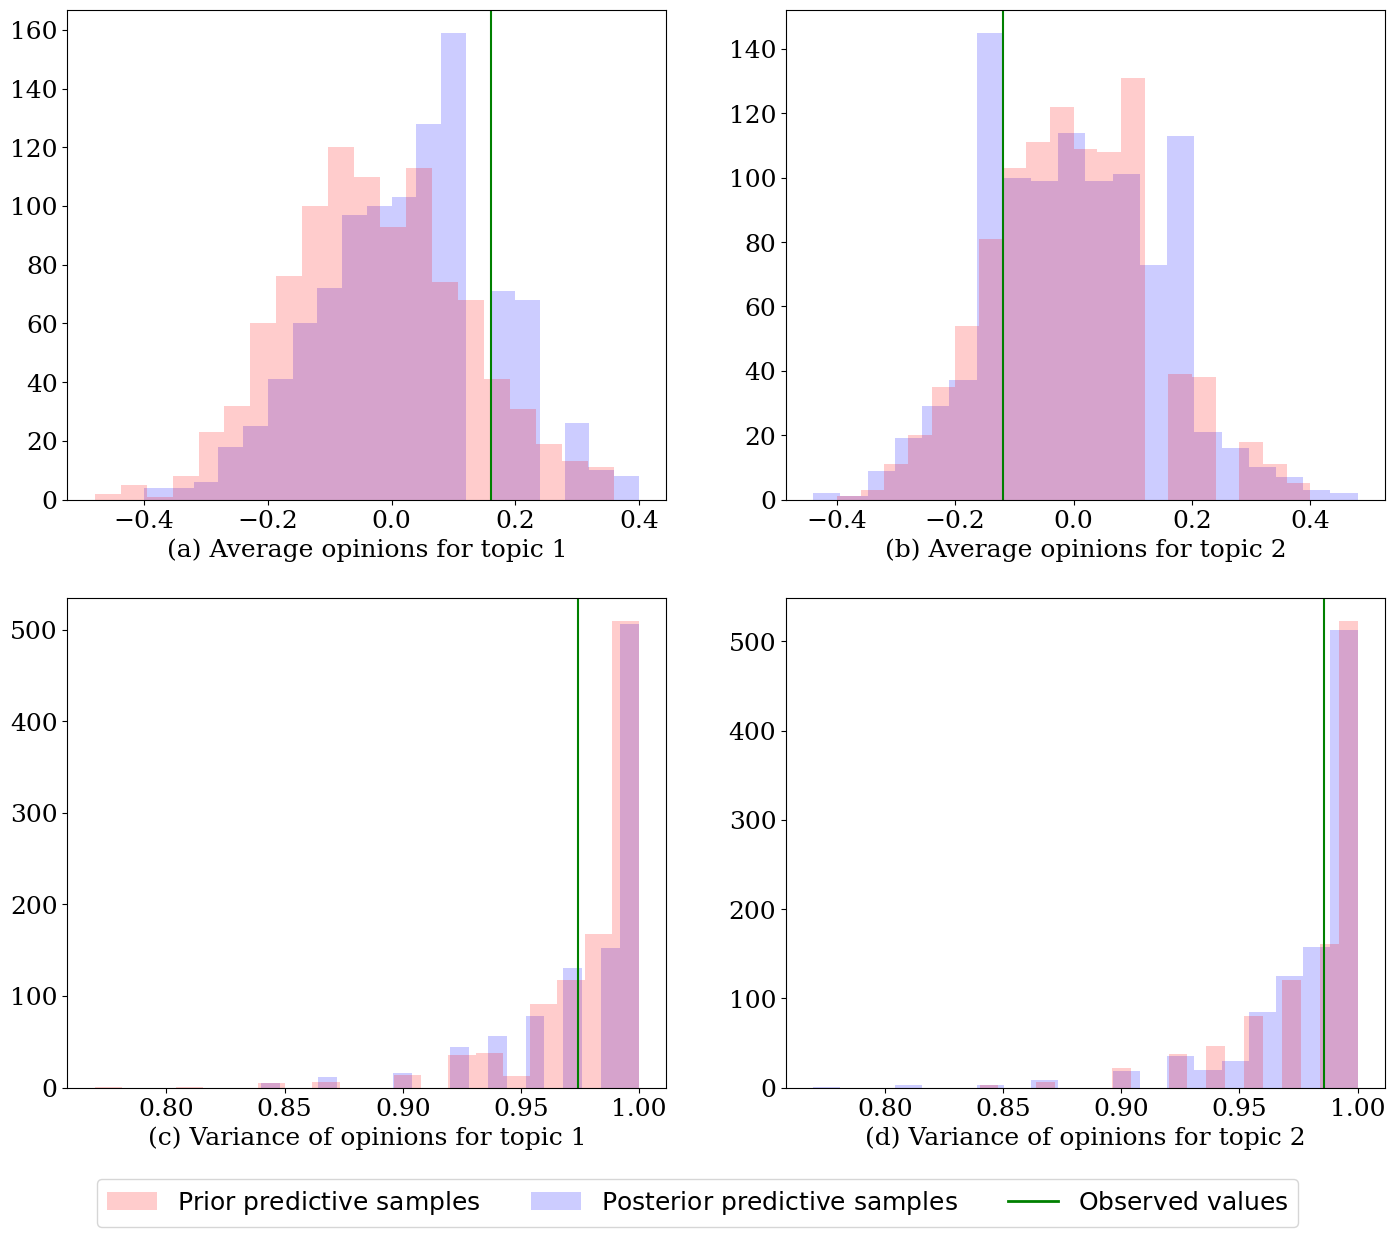

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(17,14))

axes[0, 0].hist(posterior_mean_ops_topic_1, bins=20, color='b', alpha=0.2)
axes[0, 0].hist(prior_mean_ops_topic_1, bins=20, color='r', alpha=0.2)
axes[0, 0].axvline(observation_mean_ops_topic_1, c='g')
axes[0, 0].set_xlabel(r"(a) Average opinions for topic 1", fontsize=18)

axes[0, 1].hist(posterior_mean_ops_topic_2, bins=20, color='b', alpha=0.2)
axes[0, 1].hist(prior_mean_ops_topic_2, bins=20, color='r', alpha=0.2)
axes[0, 1].axvline(observation_mean_ops_topic_2, c='g')
axes[0, 1].set_xlabel(r"(b) Average opinions for topic 2", fontsize=18)

axes[1, 0].hist(posterior_variance_ops_topc_1, bins=20, color='b', alpha=0.2)
axes[1, 0].hist(prior_variance_ops_topc_1, bins=20, color='r', alpha=0.2)
axes[1, 0].axvline(observation_variance_ops_topc_1, c='g')
axes[1, 0].set_xlabel(r"(c) Variance of opinions for topic 1", fontsize=18)
                             
axes[1, 1].hist(posterior_variance_ops_topc_2, bins=20, color='b', alpha=0.2)
axes[1, 1].hist(prior_variance_ops_topc_2, bins=20, color='r', alpha=0.2)
axes[1, 1].axvline(observation_variance_ops_topc_2, c='g')
axes[1, 1].set_xlabel(r"(d) Variance of opinions for topic 2", fontsize=18)

handles = [patches.Rectangle((0,0),0,0,facecolor='r',
                             label=r"${\rm Prior}$ ${\rm predictive}$ ${\rm samples}$", alpha=0.2),
           patches.Rectangle((0,0),0,0,facecolor='b',
                             label=r"${\rm Posterior}$ ${\rm predictive}$ ${\rm samples}$", alpha=0.2),
           Line2D([0], [0], color='g', label=r"${\rm Observed}$ ${\rm values}$", lw=2, linestyle="-")]

fig.legend(handles=handles, loc='lower center', ncol=3, fontsize=18)

plt.savefig("./overleaf_plots/graph_posterior_predictives.png", dpi=1000, format='png', bbox_inches='tight')

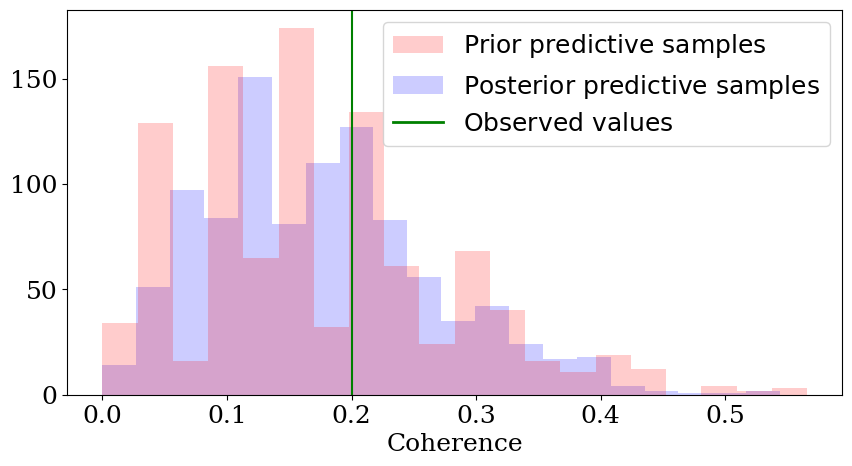

In [21]:
plt.figure(figsize=(10, 5))
plt.hist(posterior_coherence, bins=20, color='b', alpha=0.2)
plt.hist(prior_coherence, bins=20, color='r', alpha=0.2)
plt.axvline(observation_coherence, c='g')
plt.xlabel(r"Coherence", fontsize=18)
# plt.legend([r"Observed value", r"Prior predictive samples", r"Posterior predictive samples"], fontsize=18)

handles = [patches.Rectangle((0,0),0,0,facecolor='r',
                             label=r"${\rm Prior}$ ${\rm predictive}$ ${\rm samples}$", alpha=0.2),
           patches.Rectangle((0,0),0,0,facecolor='b',
                             label=r"${\rm Posterior}$ ${\rm predictive}$ ${\rm samples}$", alpha=0.2),
           Line2D([0], [0], color='g', label=r"${\rm Observed}$ ${\rm values}$", lw=2, linestyle="-")]

plt.legend(handles=handles, fontsize=18)

### Balanced Triads and Weight-opinion correlation

In [63]:
n_neg_triads = [] # Average per topic of sentiment values in final time step
glob_clust_coeffs = [] # Global clustering coefficient of networks obtained by keeping edges > 0 otherwise removing
corr_weight_ops = [] # Correlation between the weights of network and overlap in opinion profile
iu1 = np.triu_indices(50)
for pp in pps:
    final = pp[-1].numpy()
    w, s = final[:, :-2], final[:, -2:]
    A = np.sign(w)
    n_neg_triad = np.sum(np.diag(A.dot(A).dot(A)) + 1) / 2
    n_neg_triads.append(n_neg_triad)
    A = (w >= 0).astype(int)
    k = np.sum(A, axis=1)
    glob_clust_coeff = np.trace((A.dot(A)).dot(A)) / np.sum(k*(k-1))
    glob_clust_coeffs.append(glob_clust_coeff)
    overlaps = np.dot(s, s.T)[iu1]/2
    weights = w[iu1]
    corr_weight_op = np.corrcoef(weights, overlaps)
    corr_weight_ops.append(corr_weight_op[0,1])

n_neg_triads_ = [] # Average per topic of sentiment values in final time step
glob_clust_coeffs_ = [] # Global clustering coefficient of networks obtained by keeping edges > 0 otherwise removing
corr_weight_ops_ = [] # Correlation between the weights of network and overlap in opinion profile
iu1 = np.triu_indices(50)
for pp in pps_:
    final = pp[-1].numpy()
    w, s = final[:, :-2], final[:, -2:]
    A = np.sign(w)
    n_neg_triad_ = np.sum(np.diag(A.dot(A).dot(A)) + 1) / 2 
    n_neg_triads_.append(n_neg_triad_)
    A = (w >= 0).astype(int)
    k = np.sum(A, axis=1)
    glob_clust_coeff = np.trace((A.dot(A)).dot(A)) / np.sum(k*(k-1))
    glob_clust_coeffs_.append(glob_clust_coeff)
    overlaps = np.dot(s, s.T)[iu1]/2
    weights = w[iu1]
    corr_weight_op = np.corrcoef(weights, overlaps)
    corr_weight_ops_.append(corr_weight_op[0,1])

final = hopf[2][-1]
w, s = final[:, :-2], final[:, -2:]
A = np.sign(w)
n_neg_triad = np.sum(np.diag((A.dot(A)).dot(A)) + 1) / 2 
A = (w >= 0).astype(int)
k = np.sum(A, axis=1)
glob_clust_coeff = np.trace((A.dot(A)).dot(A)) / np.sum(k*(k-1))
overlaps = np.dot(s, s.T)[iu1]/2
weights = w[iu1]
corr_weight_op = np.corrcoef(weights, overlaps)[0,1]

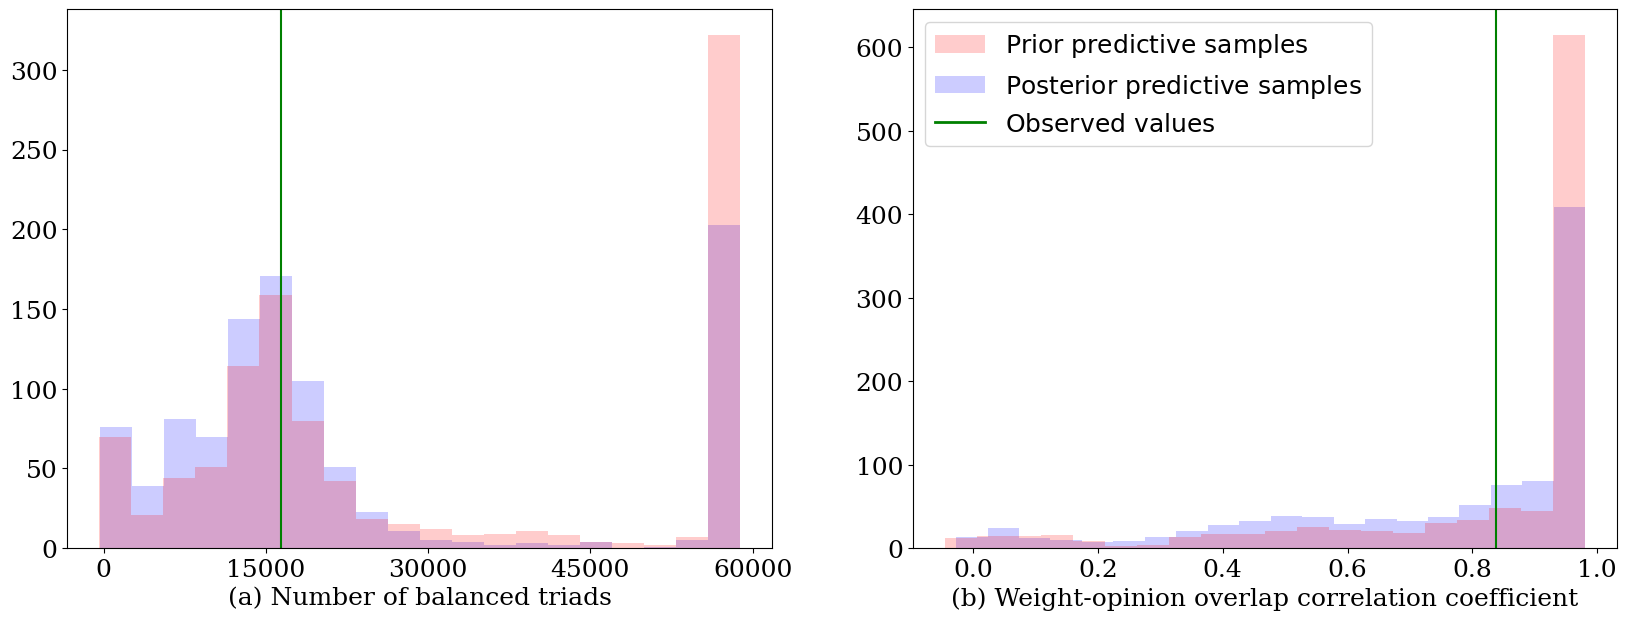

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))
axes[0].hist(n_neg_triads, bins=20, color='b', alpha=0.2)#, density=True)
axes[0].hist(n_neg_triads_, bins=20, color='r', alpha=0.2)#, density=True)
axes[0].axvline(n_neg_triad, c='g')
axes[0].set_xlabel(r"(a) Number of balanced triads", fontsize=18)
axes[0].set_xticks([0, 15000, 30000, 45000, 60000])

axes[1].hist(corr_weight_ops, bins=20, color='b', alpha=0.2)#, density=True)
axes[1].hist(corr_weight_ops_, bins=20, color='r', alpha=0.2)#, density=True)
axes[1].axvline(corr_weight_op, c='g')
axes[1].set_xlabel(r"(b) Weight-opinion overlap correlation coefficient", fontsize=18)

handles = [patches.Rectangle((0,0),0,0,facecolor='r',
                             label=r"${\rm Prior}$ ${\rm predictive}$ ${\rm samples}$", alpha=0.2),
           patches.Rectangle((0,0),0,0,facecolor='b',
                             label=r"${\rm Posterior}$ ${\rm predictive}$ ${\rm samples}$", alpha=0.2),
           Line2D([0], [0], color='g', label=r"${\rm Observed}$ ${\rm values}$", lw=2, linestyle="-")]
axes[1].legend(handles=handles, loc='upper left', ncol=1, fontsize=18)
plt.savefig("./overleaf_plots/graph_posterior_predictives.png", dpi=1000, format='png', bbox_inches='tight')

# Sensitivity Analysis

In [19]:
file_name = "1712855875.9197834"
with open(f"../../exp_dir/hopfield/{file_name}/posteriors.pkl", 'rb') as file:
    posterior = pickle.load(file)
    posterior = posterior[0]

Drawing 200 posterior samples: 9532it [00:00, 51692.69it/s]           


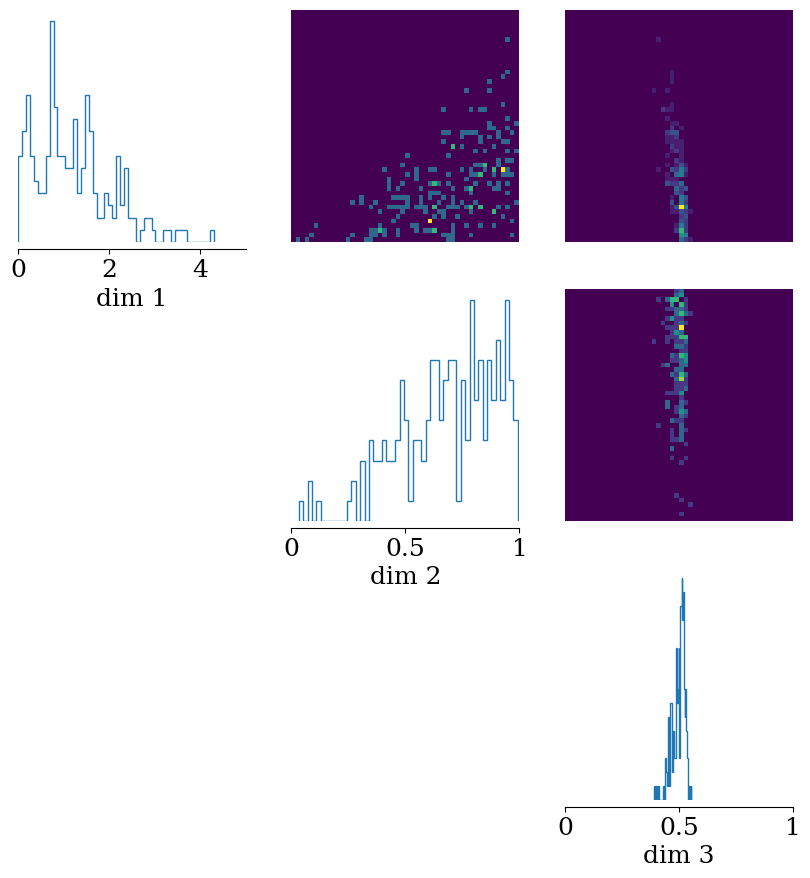

In [20]:
from sbi4abm.sbi.analysis import ActiveSubspace, pairplot

posterior_samples = posterior.sample((200,))
_ = pairplot(posterior_samples, limits=[[0,5], [0,1], [0,1]], figsize=(10, 10))

In [21]:
sensitivity = ActiveSubspace(posterior)
e_vals, e_vecs = sensitivity.find_directions(posterior_log_prob_as_property=True)

print("Eigenvalues: \n", e_vals, "\n")
print("Eigenvectors: \n", e_vecs)

Drawing 1000 posterior samples: 10248it [00:00, 42348.09it/s]           


Eigenvalues: 
 tensor([2.4379e-06, 1.2148e-05, 3.5332e-04]) 

Eigenvectors: 
 tensor([[ 0.5324, -0.8391,  0.1120],
        [ 0.8461,  0.5316, -0.0393],
        [-0.0266,  0.1157,  0.9929]])


In [54]:
print(np.array(n_neg_triads).reshape(1000, 1))

[[15229.]
 [12901.]
 [15433.]
 [19549.]
 [15589.]
 [14125.]
 [13429.]
 [14701.]
 [19225.]
 [17257.]
 [23557.]
 [22729.]
 [26257.]
 [24577.]
 [20065.]
 [13933.]
 [14209.]
 [23497.]
 [16249.]
 [12961.]
 [14101.]
 [14809.]
 [17629.]
 [13837.]
 [14941.]
 [14653.]
 [16861.]
 [17125.]
 [16909.]
 [58825.]
 [24529.]
 [17149.]
 [20449.]
 [17137.]
 [17533.]
 [13189.]
 [19717.]
 [19405.]
 [24769.]
 [14545.]
 [15289.]
 [16393.]
 [13201.]
 [16897.]
 [15457.]
 [19921.]
 [12937.]
 [14149.]
 [18037.]
 [14965.]
 [18565.]
 [16945.]
 [14341.]
 [14341.]
 [16081.]
 [12985.]
 [15157.]
 [14629.]
 [58825.]
 [14377.]
 [15445.]
 [13489.]
 [15049.]
 [16201.]
 [20377.]
 [14449.]
 [14557.]
 [20341.]
 [15061.]
 [14869.]
 [22609.]
 [17785.]
 [14029.]
 [20065.]
 [13897.]
 [14245.]
 [17965.]
 [15841.]
 [14689.]
 [58825.]
 [16993.]
 [16393.]
 [58825.]
 [16453.]
 [31753.]
 [14065.]
 [13885.]
 [16609.]
 [20233.]
 [14557.]
 [14029.]
 [23701.]
 [16141.]
 [28921.]
 [14917.]
 [14641.]
 [16357.]
 [14281.]
 [15937.]
 [18625.]


In [67]:
property_ = torch.tensor(np.array([n_neg_triads]).reshape(1000, 1), dtype=torch.float32)
theta = torch.tensor(hop[idxs], dtype=torch.float32)
print(theta)
print(property_)

tensor([[1.0838, 0.9767, 0.5094],
        [0.5139, 0.6733, 0.5173],
        [0.9216, 0.7312, 0.5194],
        ...,
        [1.3850, 0.7320, 0.5048],
        [0.2302, 0.7352, 0.5157],
        [0.9928, 0.6029, 0.5074]])
tensor([[15229.],
        [12901.],
        [15433.],
        [19549.],
        [15589.],
        [14125.],
        [13429.],
        [14701.],
        [19225.],
        [17257.],
        [23557.],
        [22729.],
        [26257.],
        [24577.],
        [20065.],
        [13933.],
        [14209.],
        [23497.],
        [16249.],
        [12961.],
        [14101.],
        [14809.],
        [17629.],
        [13837.],
        [14941.],
        [14653.],
        [16861.],
        [17125.],
        [16909.],
        [58825.],
        [24529.],
        [17149.],
        [20449.],
        [17137.],
        [17533.],
        [13189.],
        [19717.],
        [19405.],
        [24769.],
        [14545.],
        [15289.],
        [16393.],
        [13201.],
        

In [70]:
_ = sensitivity.add_property(theta, property_).train()

RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float